# 기본 세팅

In [1]:
%cd C:\\Users\\User\\Desktop\\boot camp

C:\Users\User\Desktop\boot camp


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')


In [3]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
 print(mpl.font_manager.FontProperties(fname=font).get_name())
 mpl.font_manager.fontManager.addfont(font)

NanumSquare_ac
NanumGothic
NanumGothic
NanumBarunGothic
Nanum Pen Script OTF
NanumSquareRound
NanumSquareRoundOTF
NanumSquare
NanumSquare_ac
NanumSquare Neo OTF Light
NanumSquareRound
Noto Sans KR
NanumGothic Eco
NanumGothicOTF
NanumMyeongjoOTF YetHangul
Noto Sans KR
NanumGothic Eco
NanumSquare Neo Regular
NanumMyeongjoOTF Eco
NanumBarunpenOTF
Noto Sans KR
D2Coding ligature
Nanum Pen Script
NanumSquareRound
NanumSquareOTF_ac
NanumSquare
NanumGothic Eco
NanumSquare_ac
Nanum Brush Script
NanumMyeongjoOTF Eco
NanumSquare Neo OTF Regular
NanumSquareRoundOTF
NanumSquareRoundOTF
NanumMyeongjo Eco
Nanum Brush Script OTF
NanumSquare_ac
NanumSquare Neo ExtraBold
NanumGothicOTF
NanumGothic
NanumSquare Neo OTF Heavy
NanumSquare Neo Heavy
D2Coding ligature
NanumMyeongjoOTF
NanumGothicOTF Eco
NanumGothic
NanumSquareOTF_ac
NanumBarunGothicOTF
NanumSquareOTF
NanumSquare
NanumSquareOTF_ac
NanumBarunGothicOTF YetHangul
NanumBarunGothicOTF
NanumGothicOTF Eco
D2Coding ligature
NanumMyeongjo
NanumSquareOT

In [4]:
# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
print(font_list)
# 폰트 설정하기
prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

['C:\\Windows\\Fonts\\HanSantteutDotum-Bold.ttf', 'C:\\Windows\\Fonts\\LeelUIsl.ttf', 'C:\\Windows\\Fonts\\calibrib.ttf', 'C:\\Windows\\Fonts\\segoeuii.ttf', 'C:\\Windows\\Fonts\\arial.ttf', 'C:\\Windows\\Fonts\\calibriz.ttf', 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf', 'C:\\Windows\\Fonts\\seguili.ttf', 'C:\\Windows\\Fonts\\constanb.ttf', 'C:\\Windows\\Fonts\\BOOKOSB.TTF', 'C:\\Windows\\Fonts\\sylfaen.ttf', 'C:\\Windows\\Fonts\\seguisli.ttf', 'C:\\Windows\\Fonts\\comicbd.ttf', 'C:\\Windows\\Fonts\\corbelz.ttf', 'C:\\Windows\\Fonts\\taileb.ttf', 'C:\\Windows\\Fonts\\ntailub.ttf', 'C:\\Windows\\Fonts\\monbaiti.ttf', 'C:\\Windows\\Fonts\\pala.ttf', 'C:\\Windows\\Fonts\\YuGothR.ttc', 'C:\\Windows\\Fonts\\l_10646.ttf', 'C:\\Windows\\Fonts\\HMFMOLD.TTF', 'C:\\Windows\\Fonts\\malgun.ttf', 'C:\\Windows\\Fonts\\MSUIGHUR.TTF', 'C:\\Windows\\Fonts\\msjh.ttc', 'C:\\Windows\\Fonts\\mingliub.ttc', 'C:\\Windows\\Fonts\\impact.ttf', 'C:\\Windows\\Fonts\\simsunb.ttf', 'C:\\Windows\\Fonts\\cambriab.t

In [5]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


## 데이터 로드

In [6]:
import easydict
args = easydict.EasyDict() #dict values 에 .으로 접근 가능하다 

# path 정보
args.default_path = 'C:\\Users\\User\\Desktop\\' # 파일 위치 
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'submission0407.csv' # 새로운 파일 
args.save_results = args.default_path+"model_results.csv" # 정보저장 파일 

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

In [7]:
ori_result = pd.read_csv(args.save_results)
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
ori_train.shape, ori_test.shape

((916, 12), (393, 11))

# 데이터 분리

In [8]:
ori_tr = ori_train.copy()
ori_te = ori_test.copy()

ori_tr.shape, ori_te.shape

((916, 12), (393, 11))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(ori_train, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

train.shape, test.shape

((641, 12), (275, 12))

# 전처리

In [11]:
train.drop(['ticket','cabin'], axis=1, inplace=True)
test.drop(['ticket','cabin'], axis=1, inplace=True)

In [12]:
ori_te.drop(['ticket','cabin'],axis=1,inplace=True)

In [13]:
train.drop(['passengerid'], axis=1, inplace=True)
test.drop(['passengerid'], axis=1, inplace=True)
ori_te.drop(['passengerid'],axis=1,inplace=True)

In [14]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
ori_te.reset_index(drop=True,inplace=True)

In [15]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

age_median, fare_median, embarked_mode

(28.0, 14.5, 'S')

In [16]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(0, 0, 0)

# EDA

## age

In [17]:
def social(age):
    if (age >=20) & (age<=39):
      result = '사회초년생'
    else :
      result = 'ohters'  
    return result

train['social'] = train['age'].map(lambda x: social(x))
test['social'] = test['age'].map(lambda x: social(x))
ori_te['social'] = ori_te['age'].map(lambda x: social(x))

In [18]:
def add_new_age(age):
    if age <= 5   :
      result = '유아'
    elif (age>5) & (age <=12):
      result = '어린이'
    elif (age>12) & (age <=18):
      result = '청소년'
    elif (age>18) & (age <=39):
      result = '성인'
    elif (age>39) & (age <=49):
      result = '중년'
    elif (age>49) & (age <=64):
      result = '장년'
    else :
      result = '노인'
    return result

train['new_age'] = train['age'].map(lambda x: add_new_age(x))
test['new_age'] = test['age'].map(lambda x: add_new_age(x))
ori_te['new_age'] = ori_te['age'].map(lambda x: add_new_age(x))
train.head()

,survived,pclass,name,gender,age,sibsp,parch,fare,embarked,social,new_age
0,0,1,"Klaber, Mr. Herman",male,28.0,0,0,26.5500,S,사회초년생,성인
1,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,135.6333,C,사회초년생,성인
2,0,3,"Davies, Mr. Evan",male,22.0,0,0,8.0500,S,사회초년생,성인
3,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,8.6625,S,사회초년생,성인
4,0,3,"Linehan, Mr. Michael",male,28.0,0,0,7.8792,Q,사회초년생,성인


In [19]:
train['gender_new_age'] = train.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
test['gender_new_age'] = test.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
ori_te['gender_new_age'] = ori_te.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)

print(f"{train['gender_new_age'].nunique()} / \n {train['gender_new_age'].unique()} \n")

14 / 
 ['male_성인' 'female_성인' 'male_중년' 'female_중년' 'female_장년' 'male_청소년'
 'female_유아' 'male_어린이' 'female_청소년' 'female_어린이' 'male_장년' 'male_유아'
 'male_노인' 'female_노인'] 



In [20]:
# def female_new_age(gender_new_age):
#     if gender_new_age == 'female_성인':
#       result = 1
#     else:
#       result = 0
#     return result


# train['female_new_age'] = train['gender_new_age'].map(lambda x: female_new_age(x))
# test['female_new_age'] = test['gender_new_age'].map(lambda x: female_new_age(x))
# ori_te['new_afemale_new_agege'] = ori_te['gender_new_age'].map(lambda x: female_new_age(x))
# train.head()

In [21]:
# fig = sns.displot(train, x="female_new_age", hue="survived", multiple="dodge")
# fig.fig.set_size_inches(30,10)

In [22]:
train.drop(['gender_new_age','new_age'], axis=1, inplace=True)
test.drop(['gender_new_age','new_age'], axis=1, inplace=True)
ori_te.drop(['gender_new_age','new_age'],axis=1,inplace=True)

In [23]:
train.shape , test.shape , ori_te.shape

((641, 10), (275, 10), (393, 9))

In [24]:
def add_infant(age):
  result = 'not infant'
  try:
    if age <= 5:
      result = 'infant'
  except:
    pass
  return result

train['infant'] = train['age'].map(lambda x: add_infant(x))
test['infant'] = test['age'].map(lambda x: add_infant(x))
ori_te['infant'] = ori_te['age'].map(lambda x: add_infant(x))

print(f"{train['infant'].nunique()} / \n {train['infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

2 / 
 ['not infant' 'infant'] 



((641, 11), (275, 11), (393, 10))

In [25]:
train['gender_infant'] = train.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
test['gender_infant'] = test.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
ori_te['gender_infant'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
# 성별과 5살 미만인지 유무에 따라 새로운 feature를 만듬 

print(f"{train['gender_infant'].nunique()} / \n {train['gender_infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

4 / 
 ['male_not infant' 'female_not infant' 'female_infant' 'male_infant'] 



((641, 12), (275, 12), (393, 11))

In [26]:
def female_gender_infant(gender_infant):
    if gender_infant == 'female_infant':
      result = 1
    else:
      result = 0
    return result


train['female_gender_infant'] = train['gender_infant'].map(lambda x: female_gender_infant(x))
test['female_gender_infant'] = test['gender_infant'].map(lambda x: female_gender_infant(x))
ori_te['female_gender_infant'] = ori_te['gender_infant'].map(lambda x: female_gender_infant(x))
train.head()

,survived,pclass,name,gender,age,sibsp,parch,fare,embarked,social,infant,gender_infant,female_gender_infant
0,0,1,"Klaber, Mr. Herman",male,28.0,0,0,26.5500,S,사회초년생,not infant,male_not infant,0
1,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,135.6333,C,사회초년생,not infant,female_not infant,0
2,0,3,"Davies, Mr. Evan",male,22.0,0,0,8.0500,S,사회초년생,not infant,male_not infant,0
3,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,8.6625,S,사회초년생,not infant,male_not infant,0
4,0,3,"Linehan, Mr. Michael",male,28.0,0,0,7.8792,Q,사회초년생,not infant,male_not infant,0


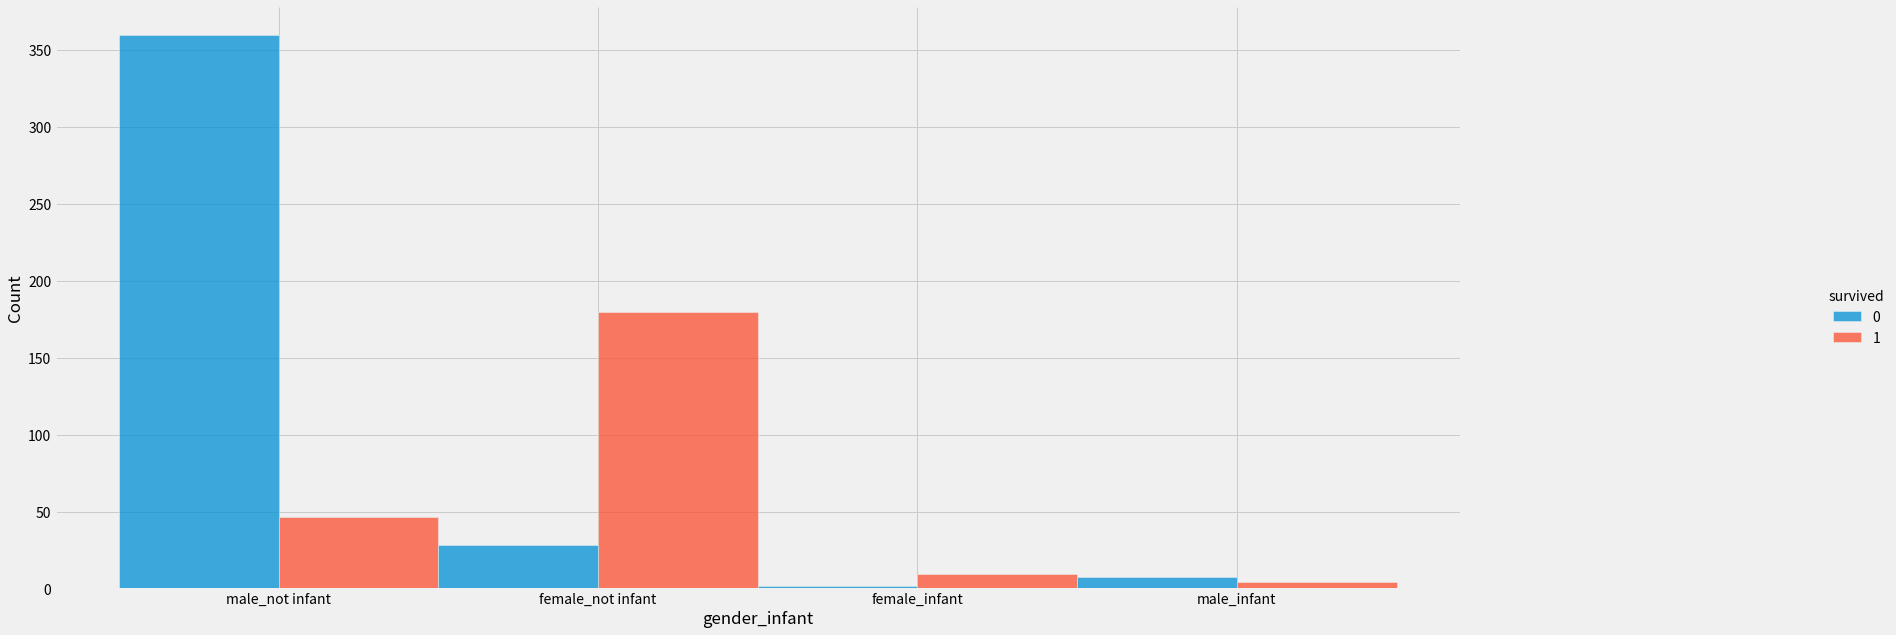

In [27]:
fig = sns.displot(train, x="gender_infant", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

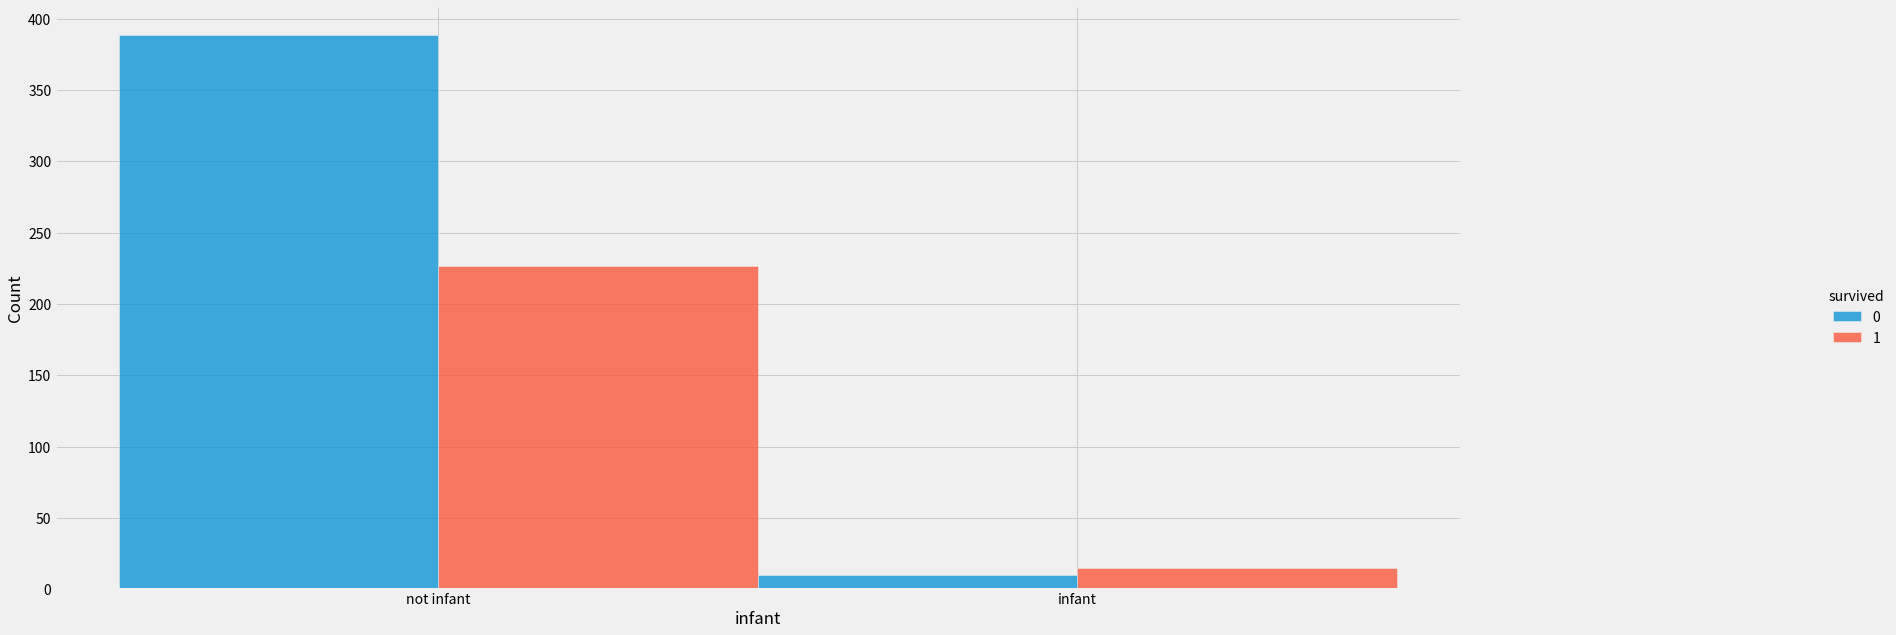

In [28]:
fig = sns.displot(train, x="infant", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## pclass

In [29]:
def add_pclass_1_level(pclass):
  result = 'high pclass(1)'
  try:
    if pclass == 3 or pclass == 2 :
      result = 'low pcalss(2,3)'
  except:
    pass
  return result

train['add_pclass_1_level'] = train['pclass'].map(lambda x: add_pclass_1_level(x))
test['add_pclass_1_level'] = test['pclass'].map(lambda x: add_pclass_1_level(x))
ori_te['add_pclass_1_level'] = ori_te['pclass'].map(lambda x: add_pclass_1_level(x))

In [30]:
train['pclass1_gender'] = train.apply(lambda row: row['gender']+'_'+row['add_pclass_1_level'], axis=1)
test['pclass1_gender'] = test.apply(lambda row: row['gender']+'_'+row['add_pclass_1_level'], axis=1)
ori_te['pclass1_gender'] = ori_te.apply(lambda row: row['gender']+'_'+row['add_pclass_1_level'], axis=1)

In [31]:
train['pclass1_gender'].value_counts()

male_low pcalss(2,3)      324
female_low pcalss(2,3)    156
male_high pclass(1)        96
female_high pclass(1)      65
Name: pclass1_gender, dtype: int64

In [32]:
def male_add_pclass_1(pclass1_gender):
  result = 0
  try:
    if pclass1_gender == 'male_low pcalss(2,3)':
      result = 1
  except:
    pass
  return result

train['male_add_pclass_1'] = train['pclass1_gender'].map(lambda x: male_add_pclass_1(x))
test['male_add_pclass_1'] = test['pclass1_gender'].map(lambda x: male_add_pclass_1(x))
ori_te['male_add_pclass_1'] = ori_te['pclass1_gender'].map(lambda x: male_add_pclass_1(x))

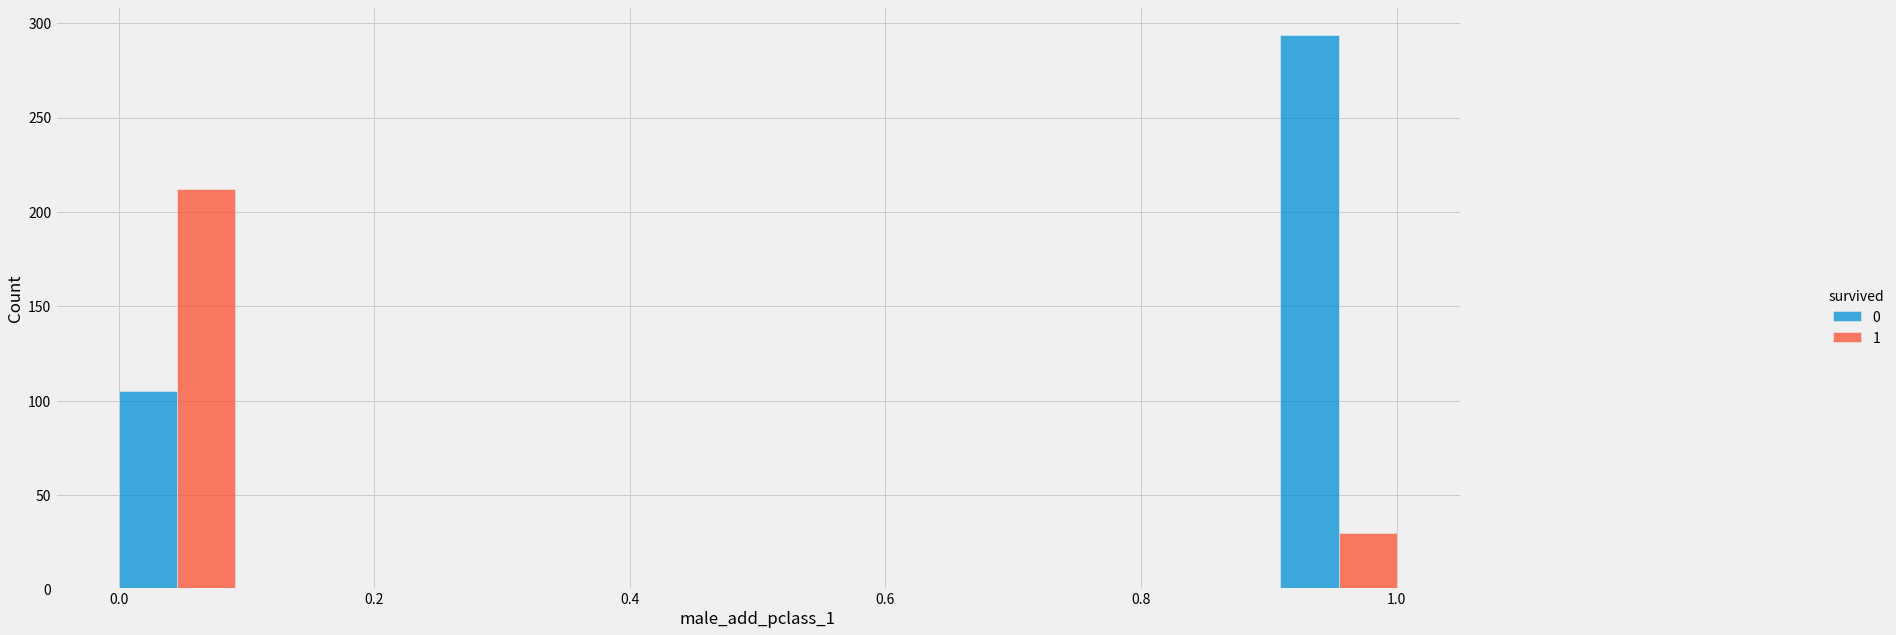

In [33]:
fig = sns.displot(train, x="male_add_pclass_1", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

In [34]:
def pclass_3_level(pclass):
  result = 0
  try:
    if pclass == 1 or pclass == 2 :
      result = 1
  except:
    pass
  return result

train['pclass_3_level'] = train['pclass'].map(lambda x: pclass_3_level(x))
test['pclass_3_level'] = test['pclass'].map(lambda x: pclass_3_level(x))
ori_te['pclass_3_level'] = ori_te['pclass'].map(lambda x: pclass_3_level(x))

In [35]:
train['pclass3_infant'] = train.apply(lambda row: str(row['infant'])+'_'+str(row['pclass_3_level']), axis=1)
test['pclass3_infant'] = test.apply(lambda row: str(row['infant'])+'_'+str(row['pclass_3_level']), axis=1)
ori_te['pclass3_infant'] = ori_te.apply(lambda row: str(row['infant'])+'_'+str(row['pclass_3_level']), axis=1)

In [36]:
train['pclass3_infant'].value_counts()

not infant_0    314
not infant_1    302
infant_0         21
infant_1          4
Name: pclass3_infant, dtype: int64

In [37]:
def low_pclass_infant(pclass3_infant):
  result = 0
  try:
    if pclass3_infant == 'infant_low pcalss(1,2)':
      result = 1
  except:
    pass
  return result

train['low_pclass_infant'] = train['pclass3_infant'].map(lambda x: low_pclass_infant(x))
test['low_pclass_infant'] = test['pclass3_infant'].map(lambda x: low_pclass_infant(x))
ori_te['low_pclass_infant'] = ori_te['pclass3_infant'].map(lambda x: low_pclass_infant(x))

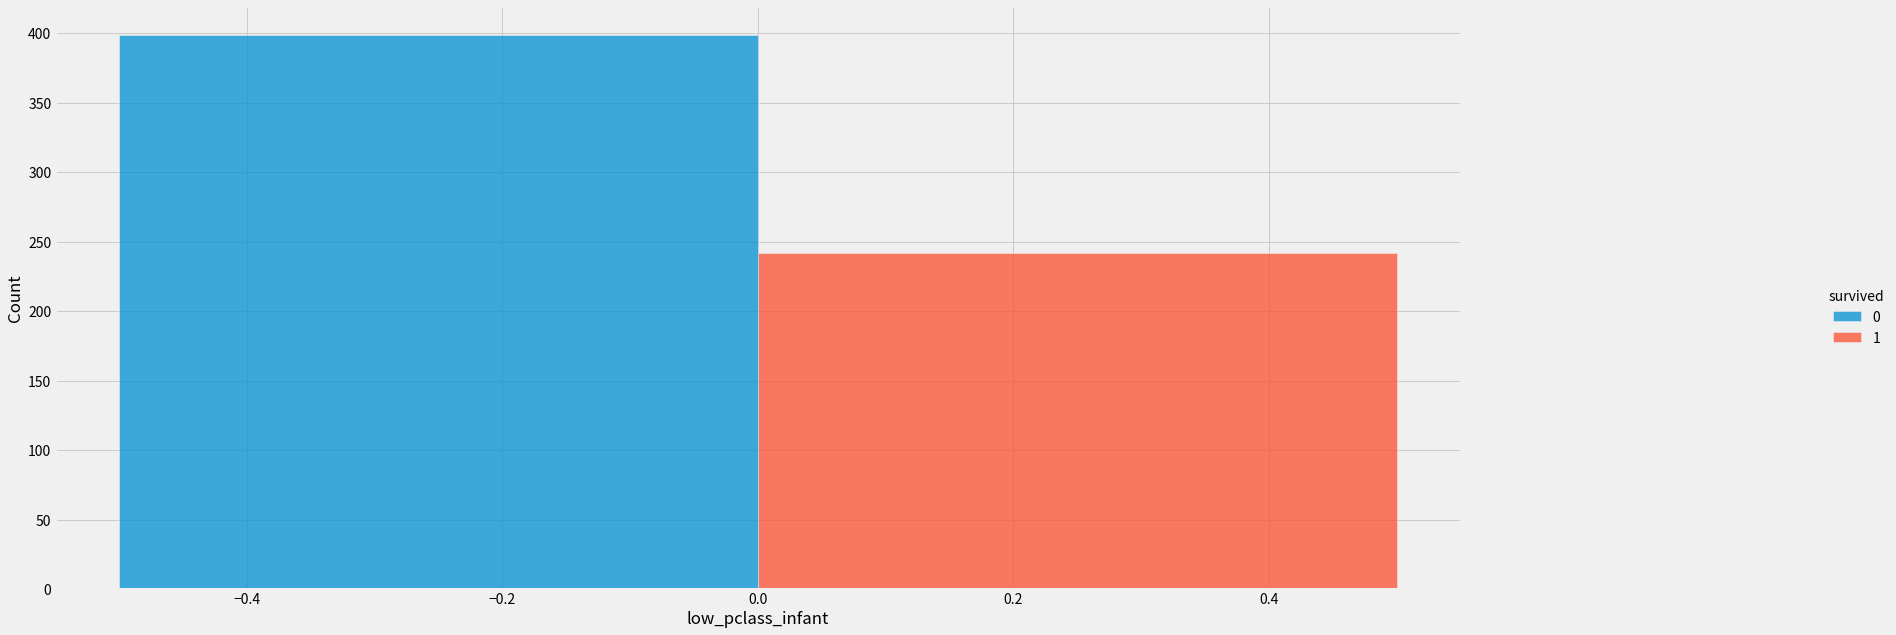

In [38]:
fig = sns.displot(train, x="low_pclass_infant", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

In [39]:
train['pclass3_gender'] = train.apply(lambda row: row['gender']+'_'+str(row['pclass_3_level']), axis=1)
test['pclass3_gender'] = test.apply(lambda row: row['gender']+'_'+str(row['pclass_3_level']), axis=1)
ori_te['pclass3_gender'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['pclass_3_level']), axis=1)

In [40]:
train['pclass3_gender'].value_counts()

male_0      234
male_1      186
female_1    120
female_0    101
Name: pclass3_gender, dtype: int64

In [41]:
def low_pclass_gender(pclass3_gender):
    if pclass3_gender == 'male_low pcalss(1,2)':
      result = 1
    elif pclass3_gender == 'female_low pcalss(1,2)':
      result = 2
    else :
      result = 3
    return result

train['low_pclass_gender'] = train['pclass3_gender'].map(lambda x: low_pclass_gender(x))
test['low_pclass_gender'] = test['pclass3_gender'].map(lambda x: low_pclass_gender(x))
ori_te['low_pclass_gender'] = ori_te['pclass3_gender'].map(lambda x: low_pclass_gender(x))

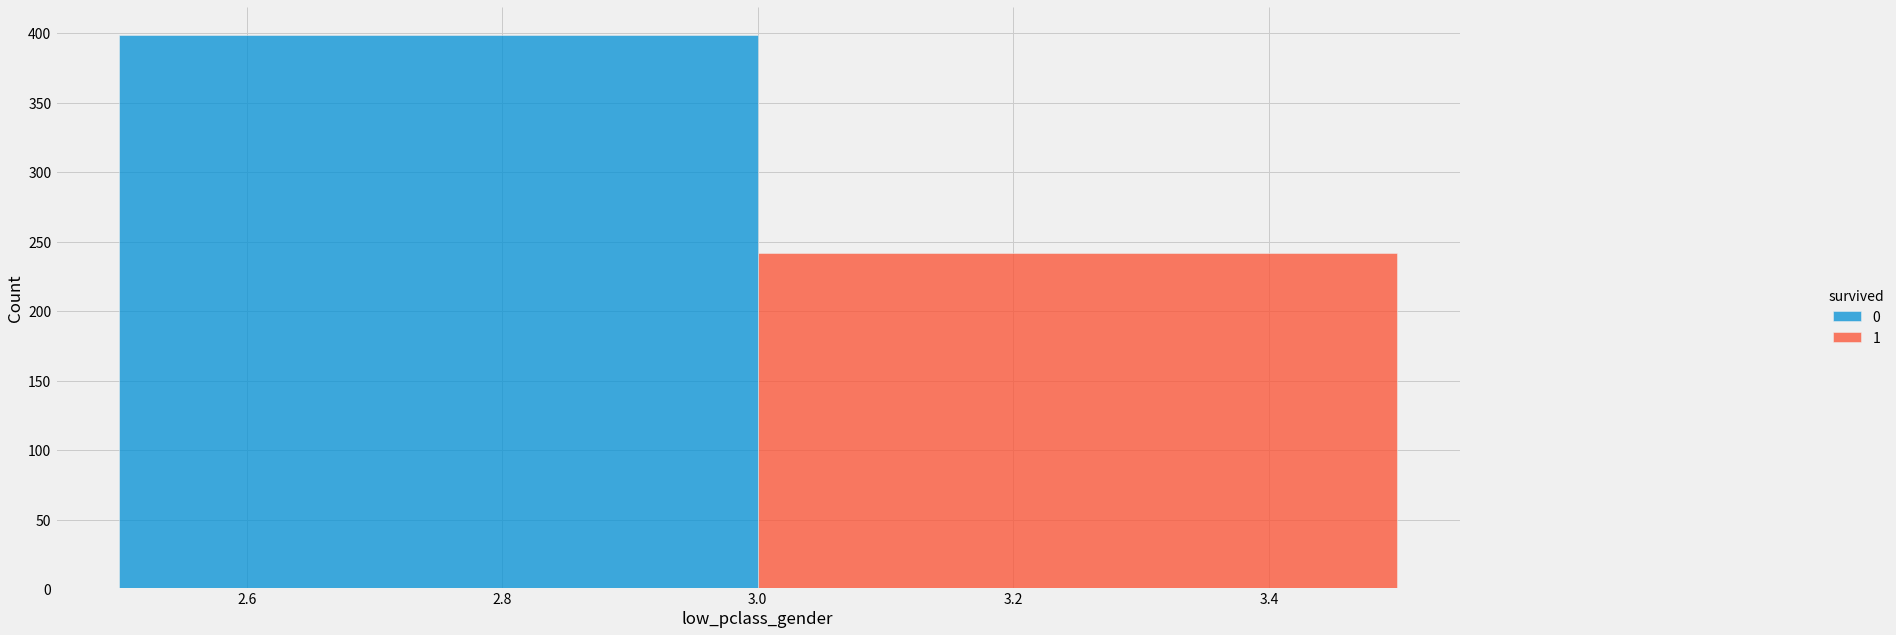

In [42]:
fig = sns.displot(train, x="low_pclass_gender", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## fare

In [43]:
def fare_leval(fare):
    if fare <= 51   :
      result = 'low fare'
    else :
      result = 'high fare'
    return result

train['fare_leval'] = train['fare'].map(lambda x: fare_leval(x))
test['fare_leval'] = test['fare'].map(lambda x: fare_leval(x))
ori_te['fare_leval'] = ori_te['fare'].map(lambda x: fare_leval(x))


In [44]:
train['pclass_1_fare_level'] = train.apply(lambda row: row['add_pclass_1_level']+'_'+row['fare_leval'], axis=1)
test['pclass_1_fare_level'] = test.apply(lambda row: row['add_pclass_1_level']+'_'+row['fare_leval'], axis=1)
ori_te['pclass_1_fare_level'] = ori_te.apply(lambda row: row['add_pclass_1_level']+'_'+row['fare_leval'], axis=1)

print(f"{train['pclass_1_fare_level'].nunique()} / \n {train['pclass_1_fare_level'].unique()} \n")

4 / 
 ['high pclass(1)_low fare' 'high pclass(1)_high fare'
 'low pcalss(2,3)_low fare' 'low pcalss(2,3)_high fare'] 



In [45]:
def low_pclass_1_low_fare_level(pclass_1_fare_level):
    if pclass_1_fare_level == 'low pcalss(2,3)_low fare':
      result = 1
    else :
      result = 0
    return result

train['low_pclass_1_low_fare_level'] = train['pclass_1_fare_level'].map(lambda x: low_pclass_1_low_fare_level(x))
test['low_pclass_1_low_fare_level'] = test['pclass_1_fare_level'].map(lambda x: low_pclass_1_low_fare_level(x))
ori_te['low_pclass_1_low_fare_level'] = ori_te['pclass_1_fare_level'].map(lambda x: low_pclass_1_low_fare_level(x))

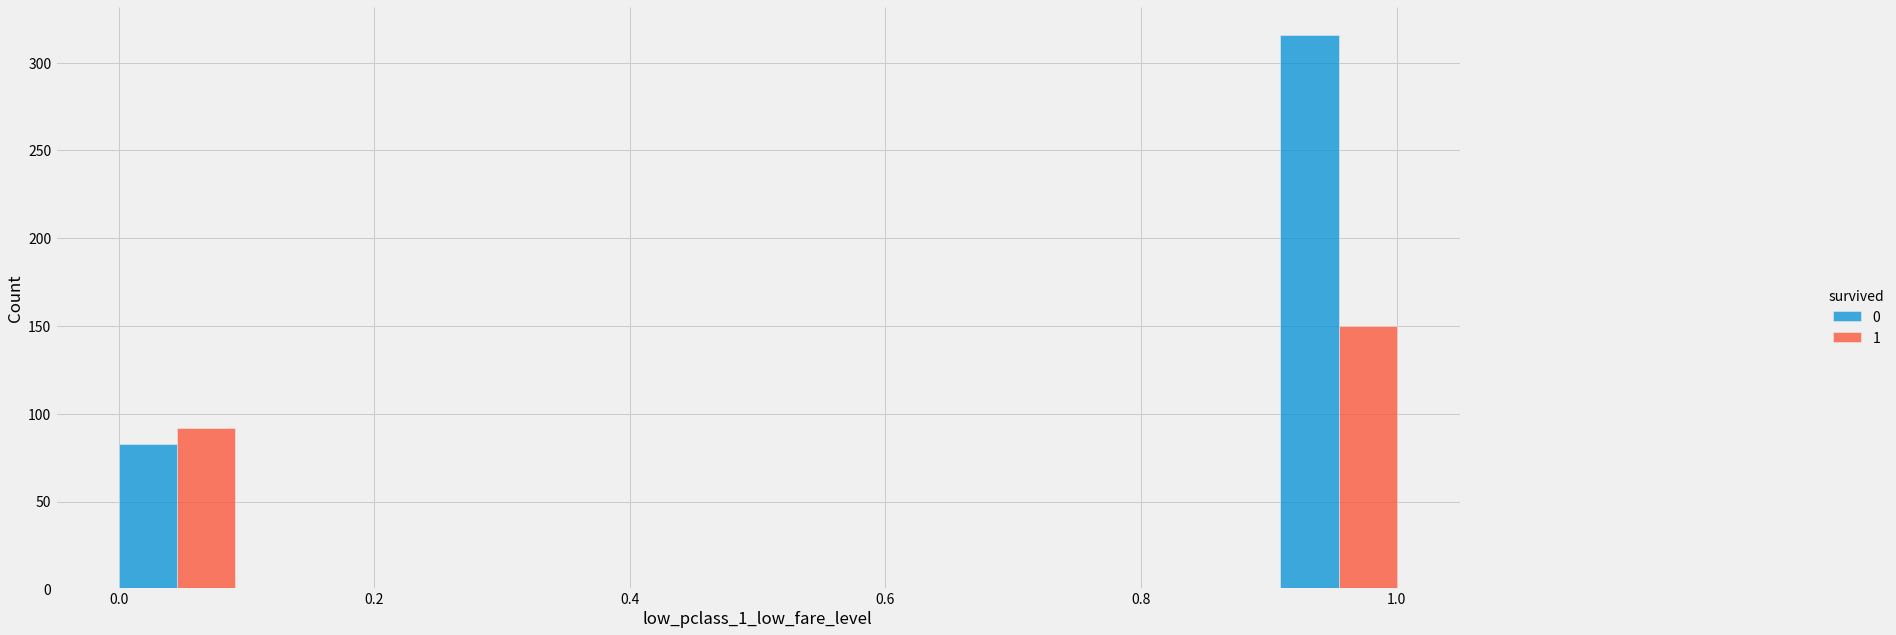

In [46]:
fig = sns.displot(train, x="low_pclass_1_low_fare_level", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## family

In [47]:
train['family'] = train['sibsp']+train['parch']+1
test['family'] = train['sibsp']+train['parch']+1
ori_te['family'] = train['sibsp']+train['parch']+1

## sibsp

In [48]:
def add_sibsp(sibsp):
  result = 'small sib'
  try:
    if sibsp >=2 :
      result = 'large sib'
  except:
    pass
  return result

train['sibsp_2_high'] = train['sibsp'].map(lambda x: add_sibsp(x))
test['sibsp_2_high'] = test['sibsp'].map(lambda x: add_sibsp(x))
ori_te['sibsp_2_high'] = ori_te['sibsp'].map(lambda x: add_sibsp(x))

In [49]:
train['sibsp_2_high_gender'] = train.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
test['sibsp_2_high_gender'] = test.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
ori_te['sibsp_2_high_gender'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)

In [50]:
train['sibsp_2_high_gender'].value_counts()

small sib_male      389
small sib_female    199
large sib_male       31
large sib_female     22
Name: sibsp_2_high_gender, dtype: int64

In [51]:
def sib_female(sibsp_2_high_gender):
    if sibsp_2_high_gender == 'small sib_female':
      result = 'sibsp 2명이하 여자'
    elif sibsp_2_high_gender == 'large sib_female'  :
      result = 'sibsp 2명이상 여자'
    else :
      result = 'others'
    return result

train['sib_female'] = train['sibsp_2_high_gender'].map(lambda x: sib_female(x))
test['sib_female'] = test['sibsp_2_high_gender'].map(lambda x: sib_female(x))
ori_te['sib_female'] = ori_te['sibsp_2_high_gender'].map(lambda x: sib_female(x))

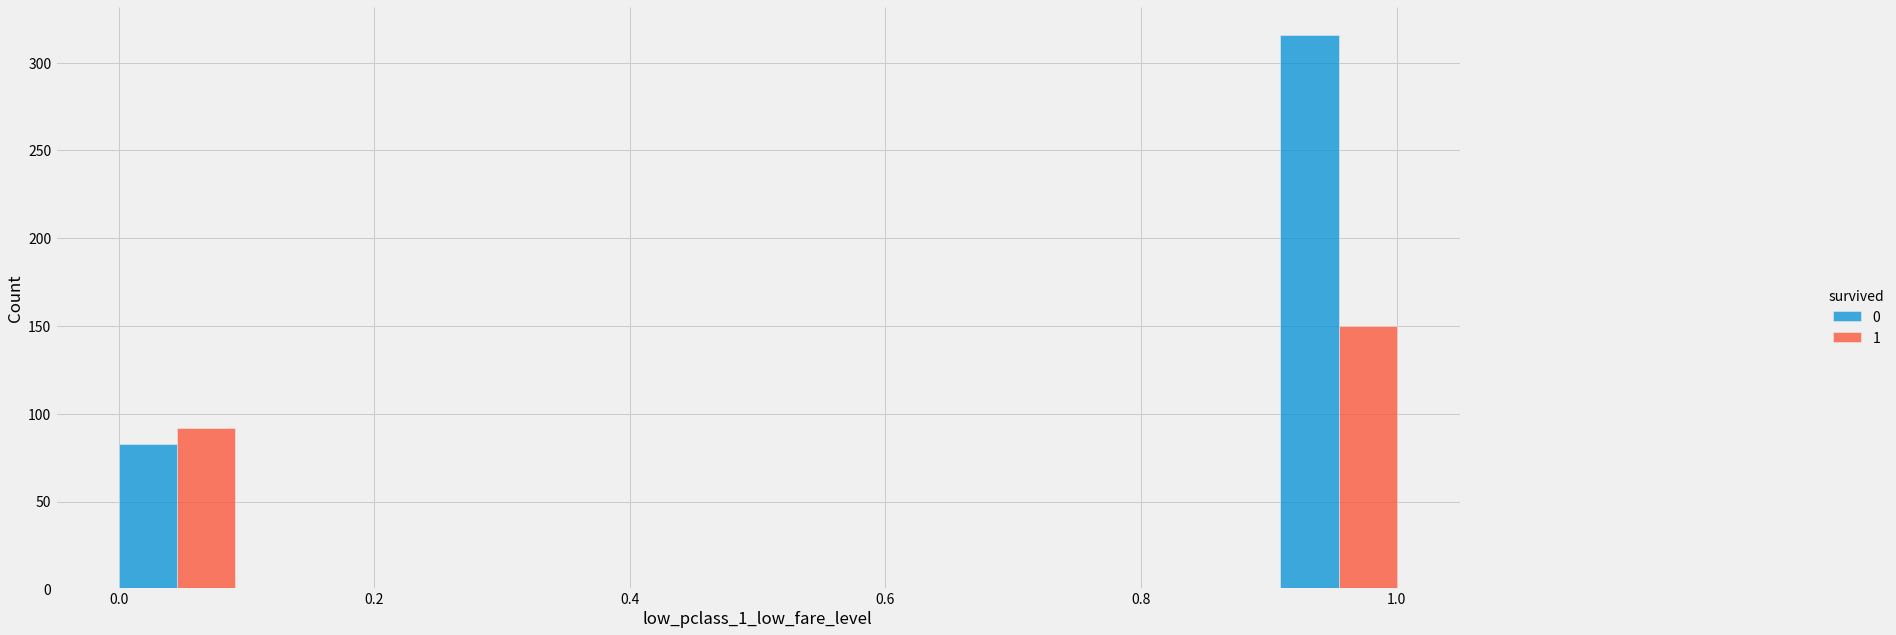

In [52]:
fig = sns.displot(train, x="low_pclass_1_low_fare_level", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## name

In [53]:
train['name_len'] = train['name'].map(lambda x : len(x))
test['name_len'] = test['name'].map(lambda x : len(x))
ori_te['name_len'] = ori_te['name'].map(lambda x : len(x))

In [54]:
def name_len_group(name_len) :
  result = 0
  if name_len <=  20 :
    result = 0
  elif name_len > 20 and name_len <= 25 :
    result = 1
  elif name_len > 25 and name_len <= 31 :
    result = 2
  else :
    result = 3
  return result

train['name_len_group'] = train['name_len'].map(lambda x: name_len_group(x))
test['name_len_group'] = test['name_len'].map(lambda x: name_len_group(x))
ori_te['name_len_group'] = ori_te['name_len'].map(lambda x: name_len_group(x))


## embarked

In [55]:
train['embarked_gender'] = train.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)
test['embarked_gender'] = test.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)
ori_te['embarked_gender'] = ori_te.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)

In [56]:
train['embarked_gender'].value_counts()

S_male      313
S_female    144
C_male       79
C_female     48
Q_female     29
Q_male       28
Name: embarked_gender, dtype: int64

In [57]:
def SQ_embarked_gender(embarked_gender):
    if embarked_gender == 'S_female':
      result = 'S 여자'
    elif embarked_gender == 'Q_female'  :
      result = 'Q 여자'
    else :
      result = 'others'
    return result

train['SQ_embarked_gender'] = train['embarked_gender'].map(lambda x: SQ_embarked_gender(x))
test['SQ_embarked_gender'] = test['embarked_gender'].map(lambda x: SQ_embarked_gender(x))
ori_te['SQ_embarked_gender'] = ori_te['embarked_gender'].map(lambda x: SQ_embarked_gender(x))

In [58]:
def embarked_Q_only(embarked) :
  if embarked =='S' :
    result = 'S 탑승지'
  else:
    result = '그외 탑승지'
  return result

train['embarked_Q_only'] = train['embarked'].map(lambda x: embarked_Q_only(x))
test['embarked_Q_only'] = test['embarked'].map(lambda x: embarked_Q_only(x))
ori_te['embarked_Q_only'] = ori_te['embarked'].map(lambda x: embarked_Q_only(x))


In [59]:
def embarked_C_only(embarked) :
  if embarked =='C' :
    result = 'C 탑승지'
  else:
    result = '그외 탑승지'
  return result

train['embarked_C_only'] = train['embarked'].map(lambda x: embarked_C_only(x))
test['embarked_C_only'] = test['embarked'].map(lambda x: embarked_C_only(x))
ori_te['embarked_C_only'] = ori_te['embarked'].map(lambda x: embarked_C_only(x))


In [60]:
train.columns

Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'social', 'infant', 'gender_infant', 'female_gender_infant',
       'add_pclass_1_level', 'pclass1_gender', 'male_add_pclass_1',
       'pclass_3_level', 'pclass3_infant', 'low_pclass_infant',
       'pclass3_gender', 'low_pclass_gender', 'fare_leval',
       'pclass_1_fare_level', 'low_pclass_1_low_fare_level', 'family',
       'sibsp_2_high', 'sibsp_2_high_gender', 'sib_female', 'name_len',
       'name_len_group', 'embarked_gender', 'SQ_embarked_gender',
       'embarked_Q_only', 'embarked_C_only'],
      dtype='object')

In [61]:
train.drop(['gender_infant','pclass1_gender','pclass_3_level','pclass3_infant','pclass3_gender','fare_leval','sibsp_2_high','sibsp_2_high_gender',
           'low_pclass_1_low_fare_level','embarked_gender'], axis=1, inplace=True)
test.drop(['gender_infant','pclass1_gender','pclass_3_level','pclass3_infant','pclass3_gender','fare_leval','sibsp_2_high','sibsp_2_high_gender',
           'low_pclass_1_low_fare_level','embarked_gender'], axis=1, inplace=True)
ori_te.drop(['gender_infant','pclass1_gender','pclass_3_level','pclass3_infant','pclass3_gender','fare_leval','sibsp_2_high','sibsp_2_high_gender',
           'low_pclass_1_low_fare_level','embarked_gender'], axis=1, inplace=True)

In [62]:
train.drop(['name'],axis=1,inplace=True)
test.drop(['name'],axis=1,inplace=True)
ori_te.drop(['name'],axis=1,inplace=True)

In [63]:
train.shape , test.shape , ori_te.shape

((641, 23), (275, 23), (393, 22))

In [64]:
train.reset_index(drop=True , inplace=True)
test.reset_index(drop=True , inplace=True)

# 분리

In [65]:
y_tr = train['survived']
X_tr = train.drop(['survived'], axis=1)

y_te = test['survived']
X_te = test.drop(['survived'], axis=1)

X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((641, 22), (641,), (275, 22), (275,))

In [66]:
X_tr.reset_index(drop=True , inplace=True)

In [67]:
train = X_tr.copy()
test = X_te.copy()

In [68]:
train.reset_index(drop=True , inplace=True)
test.reset_index(drop=True , inplace=True)

# data encoding

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
enc_cols = list(train.select_dtypes(exclude=np.number).columns) # 범주형 
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

['sibsp',
 'name_len_group',
 'pclass',
 'low_pclass_infant',
 'family',
 'male_add_pclass_1',
 'parch',
 'age',
 'female_gender_infant',
 'low_pclass_gender',
 'fare',
 'name_len']

In [71]:
train.drop(['name_len'], axis=1, inplace=True)
test.drop(['name_len'], axis=1, inplace=True)
ori_te.drop(['name_len'], axis=1, inplace=True)

In [72]:
cols=['pclass', 'gender', 'sibsp', 'parch', 'embarked',
       'social', 'infant', 'female_gender_infant', 'add_pclass_1_level',
       'male_add_pclass_1', 'low_pclass_infant', 'low_pclass_gender',
       'pclass_1_fare_level', 'family', 'sib_female', 
       'name_len_group', 'SQ_embarked_gender', 'embarked_Q_only',
       'embarked_C_only']
normal_cols = list(set(train.columns) - set(cols))

In [73]:
train.columns

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'social', 'infant', 'female_gender_infant', 'add_pclass_1_level',
       'male_add_pclass_1', 'low_pclass_infant', 'low_pclass_gender',
       'pclass_1_fare_level', 'family', 'sib_female', 'name_len_group',
       'SQ_embarked_gender', 'embarked_Q_only', 'embarked_C_only'],
      dtype='object')

In [74]:
enc = OneHotEncoder(handle_unknown = 'ignore')

tmp_tr = pd.DataFrame(
    enc.fit_transform(train[cols]).toarray(), #범주형 encoder 적용시켜서 temp_tr에 저장
    columns = enc.get_feature_names_out() # feature name을 뽑아냄 
)  
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
) 
# 수치형 데이터(train[normal_cols]) + encoding 된 문자형 데이터(tmp_tr) 를 합쳐서 enc_tr



# test (ori_te 에서 나온 te  -> 모델의 학습을 평가(잘했는지 못했는지))
tmp_te = pd.DataFrame(
    enc.transform(test[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)


# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
print(f'before: {train.shape} / {test.shape} / {ori_te.shape}')
print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')

before: (641, 21) / (275, 21) / (393, 21)
after: (641, 63) / (275, 63) / (393, 63)


In [75]:
scaling_cols = ['fare','age']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
_scaled_tr = rbs.fit_transform(enc_tr[scaling_cols])
_scaled_te = rbs.transform(enc_te[scaling_cols])
_scaled_ori_te = rbs.transform(enc_ori_te[scaling_cols])

print(f'before: {enc_tr.shape} / {enc_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape}')

before: (641, 63) / (275, 63)
after: (641, 63) / (275, 63)


In [76]:
scaled_tr.isnull().sum() , y_tr.isnull().sum()

(parch_5                               0
 add_pclass_1_level_low pcalss(2,3)    0
 sibsp_3                               0
 social_ohters                         0
 family_1                              0
                                      ..
 sibsp_0                               0
 pclass_3                              0
 family_11                             0
 fare                                  0
 age                                   0
 Length: 63, dtype: int64,
 0)

In [136]:
scaled_tr = scaled_tr.T.drop_duplicates().T # 중복 칼럼 제거
scaled_te = scaled_te.T.drop_duplicates().T
scaled_ori_te = scaled_ori_te.T.drop_duplicates().T

# model 7

In [154]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier

In [155]:
modelV7 = CatBoostClassifier(random_state=21)

modelV7.fit(scaled_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6854079	total: 4.27ms	remaining: 4.27s
1:	learn: 0.6779704	total: 11.2ms	remaining: 5.61s
2:	learn: 0.6710529	total: 16.9ms	remaining: 5.63s
3:	learn: 0.6649215	total: 23.9ms	remaining: 5.95s
4:	learn: 0.6591728	total: 26.3ms	remaining: 5.24s
5:	learn: 0.6527204	total: 29.3ms	remaining: 4.86s
6:	learn: 0.6471565	total: 32.1ms	remaining: 4.56s
7:	learn: 0.6413042	total: 36.2ms	remaining: 4.49s
8:	learn: 0.6350547	total: 41.1ms	remaining: 4.53s
9:	learn: 0.6289838	total: 44.9ms	remaining: 4.45s
10:	learn: 0.6228764	total: 48.5ms	remaining: 4.36s
11:	learn: 0.6174517	total: 52.8ms	remaining: 4.35s
12:	learn: 0.6119824	total: 54.8ms	remaining: 4.16s
13:	learn: 0.6063602	total: 58.1ms	remaining: 4.09s
14:	learn: 0.6007334	total: 61.3ms	remaining: 4.03s
15:	learn: 0.5954538	total: 64.4ms	remaining: 3.96s
16:	learn: 0.5898297	total: 67.7ms	remaining: 3.92s
17:	learn: 0.5852178	total: 71.1ms	remaining: 3.88s
18:	learn: 0.5797175	total: 74.4ms	remaining:

In [104]:
score_tr7 = modelV7.score(scaled_tr, y_tr)
score_te7 = modelV7.score(scaled_te, y_te) 

score_tr7, score_te7  

(0.9266770670826833, 0.8472727272727273)

In [105]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV7.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.9150641025641025


In [106]:
X_tr_pred = modelV7.predict(scaled_tr)

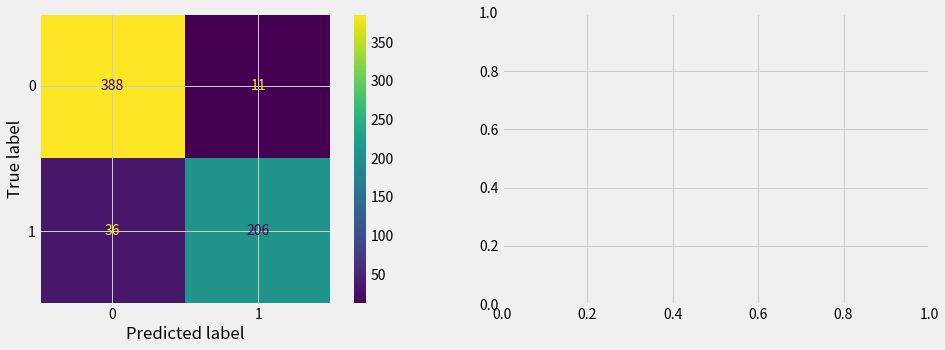

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

In [139]:
df_feature_importances = pd.DataFrame(modelV7.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()

In [140]:
df_feature_importances

,index,0
0,gender_female,23.688804
1,gender_male,12.551916
2,age,9.231008
3,fare,8.764119
4,pclass_3,6.905314
5,sib_female_sibsp 2명이하 여자,3.624030
6,name_len_group_3,2.840931
7,sibsp_1,2.331254
8,"pclass_1_fare_level_low pcalss(2,3)_low fare",1.934911
9,name_len_group_0,1.872758


## model 7 submission

In [110]:
# args.results.append(
#     {
#         'model': 'modelV6',
#         'score_tr': score_tr7,
#         'score_te': score_te7,
#         'auc_te': auc_te7,
#         'ori_te_pred': ori_te_pred7,
#         'len_features': drop_tr.shape[1],
#         'feaute_importances': list(df_feature_importances['index'].values[:drop_tr.shape[1]]),
#         'create_dt': '0409'
#     }
# )

In [111]:
# df_results = pd.DataFrame(args.results)
# df_results

,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
0,modelV6,0.926677,0.847273,0.903537,"[0.764966748845373, 0.9221028336971246, 0.8800...",10,"[gender_female, gender_male, age, fare, pclass...",0409


In [112]:
# submission = pd.read_csv(args.default_submission_csv)
# submission.head(2)

,passengerid,survived
0,916,0.5
1,917,0.5


In [113]:
# submission['survived'] = df_results.loc[0, ['ori_te_pred']].values[0] # 인덱스 2번에 헤당하는 ori_te_pred 뽑고 values는 array를 하나 풀어주기 위한 용도
# print(f'{submission.isnull().sum().sum()}')
# submission.head()

0


,passengerid,survived
0,916,0.764967
1,917,0.922103
2,918,0.880007
3,919,0.107581
4,920,0.987157


In [114]:
# submission.to_csv(args.submission_csv, header=True, index=False) # 앞에서 지정한 submission_0407.csv로 저장된다
# df_results.to_csv(args.save_results,header=True,index=False)

## model 8

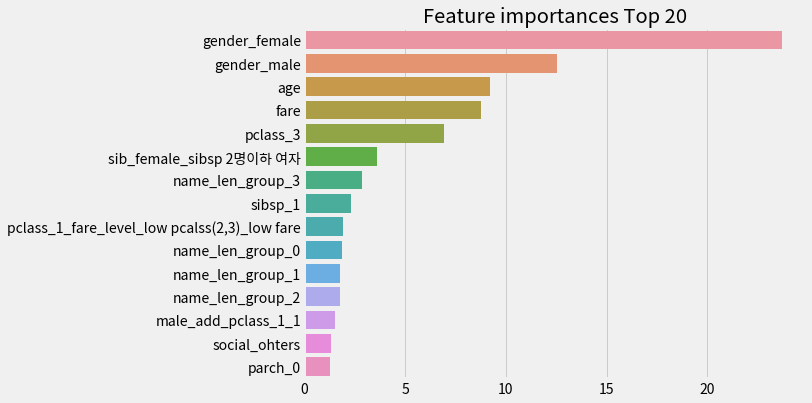

In [156]:
importances_values = modelV7.feature_importances_
importances = pd.Series(importances_values, index=scaled_tr.columns)
top = importances.sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top, y = top.index)
plt.show()

In [157]:
top_index = top.index

In [158]:
top_index

Index(['gender_female', 'gender_male', 'age', 'fare', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'name_len_group_3', 'sibsp_1',
       'pclass_1_fare_level_low pcalss(2,3)_low fare', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_2', 'male_add_pclass_1_1',
       'social_ohters', 'parch_0'],
      dtype='object')

In [159]:
drop_tr = enc_tr[['gender_female', 'gender_male', 'age', 'fare', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'name_len_group_3', 'sibsp_1',
       'pclass_1_fare_level_low pcalss(2,3)_low fare', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_2', 'male_add_pclass_1_1',
       'social_ohters','parch_0']]
drop_te = enc_te[['gender_female', 'gender_male', 'age', 'fare', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'name_len_group_3', 'sibsp_1',
       'pclass_1_fare_level_low pcalss(2,3)_low fare', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_2', 'male_add_pclass_1_1',
       'social_ohters','parch_0']]
drop_ori_te = enc_ori_te[['gender_female', 'gender_male', 'age', 'fare', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'name_len_group_3', 'sibsp_1',
       'pclass_1_fare_level_low pcalss(2,3)_low fare', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_2', 'male_add_pclass_1_1',
       'social_ohters','parch_0']]

In [90]:
# drop_tr = enc_tr[['age','gender_female', 'fare', 'gender_male',
#      'name_len_group','sibsp', 'sib_female_sibsp 2명이하 여자', 'pclass','low_pclass_gender_1,2등급 여자']]
# drop_te = enc_te[['age','gender_female', 'fare', 'gender_male',
#      'name_len_group','sibsp', 'sib_female_sibsp 2명이하 여자', 'pclass','low_pclass_gender_1,2등급 여자']]
# drop_ori_te = enc_ori_te[['age','gender_female', 'fare', 'gender_male',
#      'name_len_group','sibsp', 'sib_female_sibsp 2명이하 여자', 'pclass','low_pclass_gender_1,2등급 여자']]

KeyError: "['name_len_group', 'sibsp', 'pclass', 'low_pclass_gender_1,2등급 여자'] not in index"

In [160]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## RandomForestClassifier

In [ ]:
modelV7 = RandomForestClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

In [ ]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

In [ ]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

In [ ]:
X_tr_pred = modelV7.predict(drop_tr)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

## cat boost

In [161]:
modelV7 = CatBoostClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6871493	total: 5.1ms	remaining: 5.09s
1:	learn: 0.6808093	total: 10.1ms	remaining: 5.04s
2:	learn: 0.6735505	total: 14.1ms	remaining: 4.68s
3:	learn: 0.6674717	total: 19.7ms	remaining: 4.91s
4:	learn: 0.6610853	total: 23.2ms	remaining: 4.61s
5:	learn: 0.6546001	total: 26.6ms	remaining: 4.4s
6:	learn: 0.6489931	total: 29.3ms	remaining: 4.16s
7:	learn: 0.6428908	total: 34.1ms	remaining: 4.23s
8:	learn: 0.6375687	total: 36.4ms	remaining: 4.01s
9:	learn: 0.6311228	total: 39.7ms	remaining: 3.93s
10:	learn: 0.6247942	total: 43.3ms	remaining: 3.89s
11:	learn: 0.6198110	total: 46.5ms	remaining: 3.83s
12:	learn: 0.6144862	total: 49.6ms	remaining: 3.77s
13:	learn: 0.6085429	total: 52.1ms	remaining: 3.67s
14:	learn: 0.6032336	total: 54.6ms	remaining: 3.59s
15:	learn: 0.5974824	total: 58.1ms	remaining: 3.57s
16:	learn: 0.5929376	total: 60.7ms	remaining: 3.51s
17:	learn: 0.5871259	total: 64.4ms	remaining: 3.51s
18:	learn: 0.5828066	total: 66.2ms	remaining: 3

In [162]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

(0.9360374414976599, 0.8472727272727273)

In [163]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

model: 0.9129835807467387


In [171]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

(393,)

In [ ]:
X_tr_pred = modelV7.predict(drop_tr)

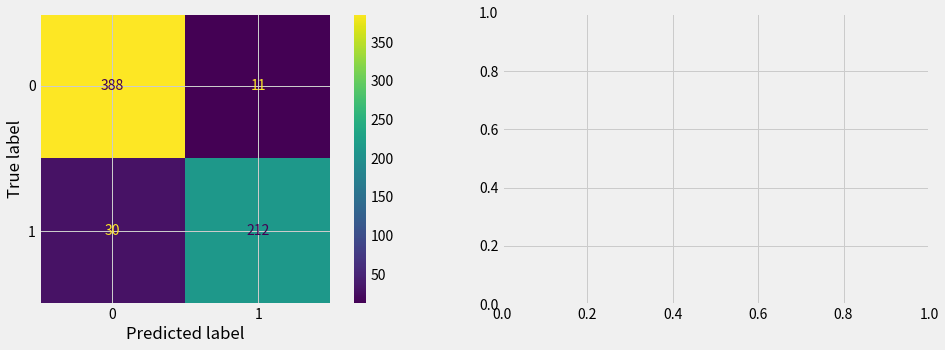

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])4884
148
plt.show()

In [172]:
drop_tr_pred7 = modelV7.predict_proba(drop_tr)[:,1]
drop_tr_pred7

array([0.20783396, 0.98836164, 0.03079407, 0.04322079, 0.04493831,
       0.11006507, 0.04573367, 0.16486505, 0.03320424, 0.91666336,
       0.13344473, 0.04328451, 0.91197406, 0.91446885, 0.09977299,
       0.85841867, 0.99063465, 0.03339642, 0.04692706, 0.30923957,
       0.04127994, 0.26211692, 0.40949958, 0.06428235, 0.95197867,
       0.21386896, 0.06225169, 0.89938549, 0.0498593 , 0.91248054,
       0.17325353, 0.05471904, 0.07668059, 0.08293427, 0.08779182,
       0.06143413, 0.1899842 , 0.03606981, 0.02981161, 0.06354798,
       0.71457687, 0.936435  , 0.04026031, 0.93031233, 0.10043223,
       0.98415099, 0.09092557, 0.05807831, 0.89868933, 0.11958332,
       0.91793403, 0.0527888 , 0.03714244, 0.03335051, 0.90824142,
       0.9285538 , 0.04161931, 0.05342473, 0.80930063, 0.81911067,
       0.1536267 , 0.078414  , 0.75815457, 0.99213943, 0.94395125,
       0.04438236, 0.1110756 , 0.9914442 , 0.04143764, 0.8504587 ,
       0.83244059, 0.03859691, 0.06877593, 0.07263612, 0.05594

In [178]:
drrop_tr_pred7_list = drop_tr_pred7.tolist()

In [175]:
pd.concat([drop_tr,drop_tr_pred7],axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [179]:
drop_tr['predict'] = drrop_tr_pred7_list

In [184]:
drop_tr['predict'].describe()

count    641.000000
mean       0.376842
std        0.387512
min        0.014098
25%        0.055560
50%        0.126020
75%        0.858419
max        0.996293
Name: predict, dtype: float64

## DecisionTreeClassifier

In [ ]:
modelV7 = DecisionTreeClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

In [ ]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

In [ ]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

In [ ]:
X_tr_pred = modelV7.predict(drop_tr)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

## XGBclassifier

In [ ]:
modelV7 = XGBClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

In [ ]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

In [ ]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

In [ ]:
X_tr_pred = modelV7.predict(drop_tr)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

## submission

In [126]:
# args.results.append(
#     {
#         'model': 'modelV6',
#         'score_tr': score_tr7,
#         'score_te': score_te7,
#         'auc_te': auc_te7,
#         'ori_te_pred': ori_te_pred7,
#         'len_features': drop_tr.shape[1],
#         'feaute_importances': list(df_feature_importances['index'].values[:drop_tr.shape[1]]),
#         'create_dt': '0409'
#     }
# )

In [127]:
# df_results = pd.DataFrame(args.results)
# df_results

,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
0,modelV6,0.926677,0.847273,0.903537,"[0.764966748845373, 0.9221028336971246, 0.8800...",10,"[gender_female, gender_male, age, fare, pclass...",0409
1,modelV6,0.936037,0.847273,0.912984,"[0.7213455323348064, 0.9321081048922474, 0.933...",15,"[gender_female, gender_male, age, fare, pclass...",0409


In [128]:
# submission = pd.read_csv(args.default_submission_csv)
# submission.head(2)

,passengerid,survived
0,916,0.5
1,917,0.5


In [131]:
submission['survived'] = df_results.loc[1, ['ori_te_pred']].values[0] # 인덱스 2번에 헤당하는 ori_te_pred 뽑고 values는 array를 하나 풀어주기 위한 용도
print(f'{submission.isnull().sum().sum()}')
submission.head()

0


,passengerid,survived
0,916,0.721346
1,917,0.932108
2,918,0.933821
3,919,0.132893
4,920,0.974891


In [167]:
submission

,passengerid,survived
0,916,0.721346
1,917,0.932108
2,918,0.933821
3,919,0.132893
4,920,0.974891
...,...,...
388,1304,0.913202
389,1305,0.975038
390,1306,0.868716
391,1307,0.560917


In [132]:
# submission.to_csv(args.submission_csv, header=True, index=False) # 앞에서 지정한 submission_0407.csv로 저장된다
# df_results.to_csv(args.save_results,header=True,index=False)